In [29]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics as m
import matplotlib.pyplot as plt


In [3]:
advert=pd.read_csv("Advertising_sales.csv")
print(advert)


     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [4]:
advert.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [8]:
advert

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
advert.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
advert.shape

(200, 4)

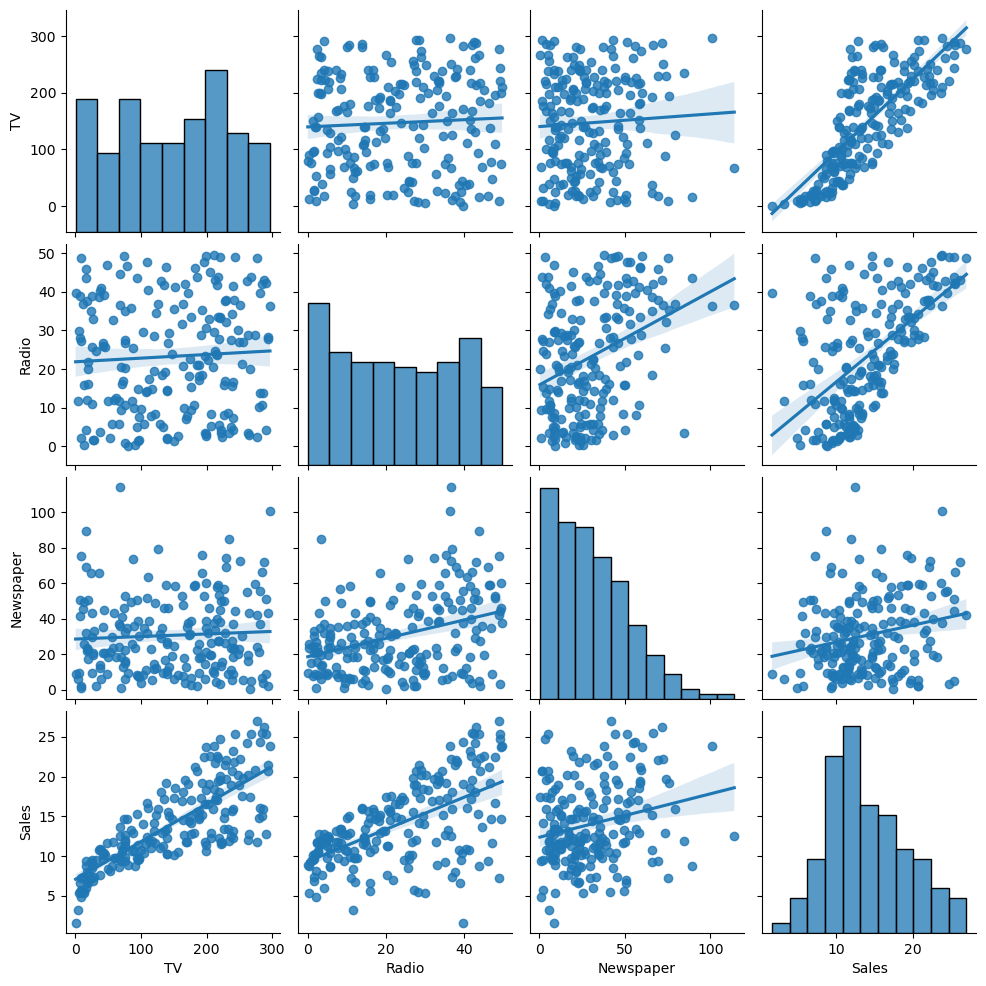

In [13]:
import seaborn as sns
sns.pairplot(advert,kind='reg')

<Axes: >

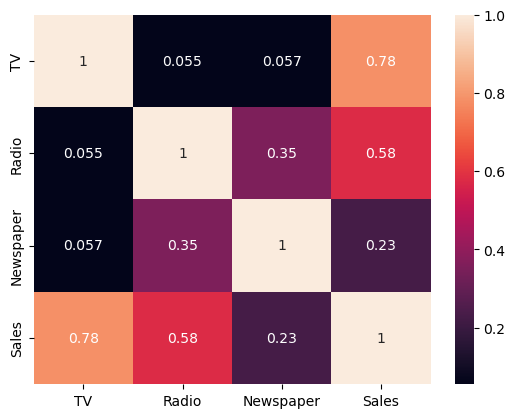

In [14]:
sns.heatmap(advert.corr(),annot=True) # annot, If True, write the data value in each cell.

In [15]:
x=advert[['TV','Radio','Newspaper']]

In [16]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [6]:
y=advert.Sales

In [17]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

In [20]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

# Multiple Linear Regression

In [34]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

linreg.intercept_

linreg.coef_

y_pred=linreg.predict(x_test)

y_pred




array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [35]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

     Actual  Predicted
58     23.8  21.735772
40     16.6  16.456938
34      9.5   7.659932
102    14.8  17.892027
184    17.6  18.677307
198    25.5  23.862719
95     16.9  16.336236
4      12.9  13.456492
29     10.5   9.177296
168    17.1  17.360562
171    14.5  14.467799
18     11.3   9.856976
11     17.4  17.260570
89     16.7  16.718669
110    13.4  15.095303
118    15.9  15.589237
159    12.9  12.451882
35     12.8  17.279252
136     9.5  11.094411
59     18.4  18.068899
51     10.7   9.334331
16     12.5  12.913458
44      8.5   8.784280
94     11.5  10.466707
31     11.9  11.403032
162    14.9  15.031047
38     10.1   9.784794
28     18.9  19.460286
193    19.6  18.229549
27     15.9  17.195890
47     23.2  21.603042
165    11.9  14.719014
194    17.3  16.292055
177    11.7  12.364323
176    20.2  19.988313
97     15.5  15.375564
174    11.5  13.966783
73     11.0  10.068095
69     22.3  20.971973
172     7.6   7.458778


In [36]:
from sklearn import metrics as m 
m.mean_absolute_error(y_test,y_pred)

1.0402154012924723

In [37]:
m.mean_squared_error(y_test,y_pred)

1.9918855518287923

In [38]:
np.sqrt(m.mean_squared_error(y_test,y_pred ))

1.4113417558581594

In [39]:
m.r2_score(y_test,y_pred)

0.8927605914615383

# Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_reg=DecisionTreeRegressor()
Dec_Tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
y_pred=Dec_Tree_reg.predict(x_test)

In [42]:
y_pred

array([23.7, 16.6,  9.6, 13.4, 17.4, 24.4, 17.1, 14.1, 10.9, 17. , 15.5,
       11.3, 17. , 14.6, 13.4, 18.5, 12.2, 12.3,  8. , 18.3, 10.6, 13.3,
        7. , 12.4, 11.4, 14.4, 10.1, 19.8, 18. , 15.7, 21.7, 11.7, 18. ,
       12.6, 19.8, 14.9, 12. , 11.2, 21.7,  6.6])

In [43]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

     Actual  Predicted
58     23.8       23.7
40     16.6       16.6
34      9.5        9.6
102    14.8       13.4
184    17.6       17.4
198    25.5       24.4
95     16.9       17.1
4      12.9       14.1
29     10.5       10.9
168    17.1       17.0
171    14.5       15.5
18     11.3       11.3
11     17.4       17.0
89     16.7       14.6
110    13.4       13.4
118    15.9       18.5
159    12.9       12.2
35     12.8       12.3
136     9.5        8.0
59     18.4       18.3
51     10.7       10.6
16     12.5       13.3
44      8.5        7.0
94     11.5       12.4
31     11.9       11.4
162    14.9       14.4
38     10.1       10.1
28     18.9       19.8
193    19.6       18.0
27     15.9       15.7
47     23.2       21.7
165    11.9       11.7
194    17.3       18.0
177    11.7       12.6
176    20.2       19.8
97     15.5       14.9
174    11.5       12.0
73     11.0       11.2
69     22.3       21.7
172     7.6        6.6


In [44]:
from sklearn import metrics as m 

In [45]:
m.mean_absolute_error(y_test,y_pred)

0.6825000000000003

In [46]:
m.mean_squared_error(y_test,y_pred)

0.8397500000000002

In [47]:
np.sqrt(m.mean_squared_error(y_test,y_pred ))

0.9163787426604789

In [48]:
m.r2_score(y_test,y_pred)

0.9547894239016431